https://www.kaggle.com/code/khotijahs1/breast-cancer-wisconsin-prediction-supervised

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
# load dataset
folder = '/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/'

In [72]:
import pandas as pd

read_file = pd.read_csv (r'/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.txt')
read_file.to_csv (r'/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.csv', index=None)

In [73]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.csv')
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [74]:
# adding column name to the respective columns
data.columns =['code_number', 'Clump_Thickness', 'Cell_Size_Uniformity', 'Cell Shape_Uniformity','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Chromatin','Normal_Nucleoli','Mitoses','Class']
# displaying the DataFrame
print(data)

     code_number  Clump_Thickness  Cell_Size_Uniformity  \
0        1002945                5                     4   
1        1015425                3                     1   
2        1016277                6                     8   
3        1017023                4                     1   
4        1017122                8                    10   
..           ...              ...                   ...   
693       776715                3                     1   
694       841769                2                     1   
695       888820                5                    10   
696       897471                4                     8   
697       897471                4                     8   

     Cell Shape_Uniformity  Marginal_Adhesion  Epithelial_Cell_Size  \
0                        4                  5                     7   
1                        1                  1                     2   
2                        8                  1                     3   
3      

In [75]:
# Preprocess the data
#replacing all the datapoints that have no value with -99999
data.replace('?',-99999, inplace=True)
print(data.axes)
#changing the value of the column id =1 as machine learning screening on id will not provide us insight
data.drop(['code_number'], 1, inplace=True)

[RangeIndex(start=0, stop=698, step=1), Index(['code_number', 'Clump_Thickness', 'Cell_Size_Uniformity',
       'Cell Shape_Uniformity', 'Marginal_Adhesion', 'Epithelial_Cell_Size',
       'Bare_Nuclei', 'Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')]


<ipython-input-75-324defb5ea83>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['code_number'], 1, inplace=True)


In [76]:
data.info

<bound method DataFrame.info of      Clump_Thickness  Cell_Size_Uniformity  Cell Shape_Uniformity  \
0                  5                     4                      4   
1                  3                     1                      1   
2                  6                     8                      8   
3                  4                     1                      1   
4                  8                    10                     10   
..               ...                   ...                    ...   
693                3                     1                      1   
694                2                     1                      1   
695                5                    10                     10   
696                4                     8                      6   
697                4                     8                      8   

     Marginal_Adhesion  Epithelial_Cell_Size Bare_Nuclei  Chromatin  \
0                    5                     7          10          3 

In [77]:
data.shape

(698, 10)

In [78]:
import sklearn
print(sklearn.__version__)

1.0.2


In [79]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [80]:
# How many benign and malignant data?
data['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

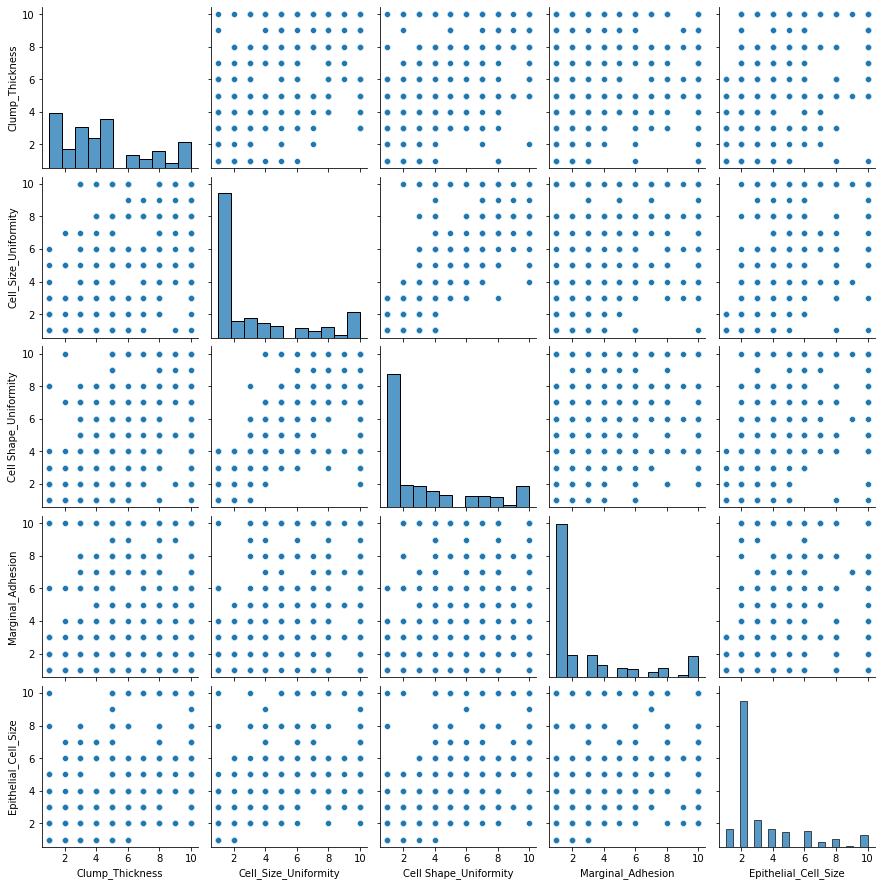

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's plot out just the first 5 variables (features)
sns.pairplot(data, vars = ['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell Shape_Uniformity', 'Marginal_Adhesion',
       'Epithelial_Cell_Size'] )

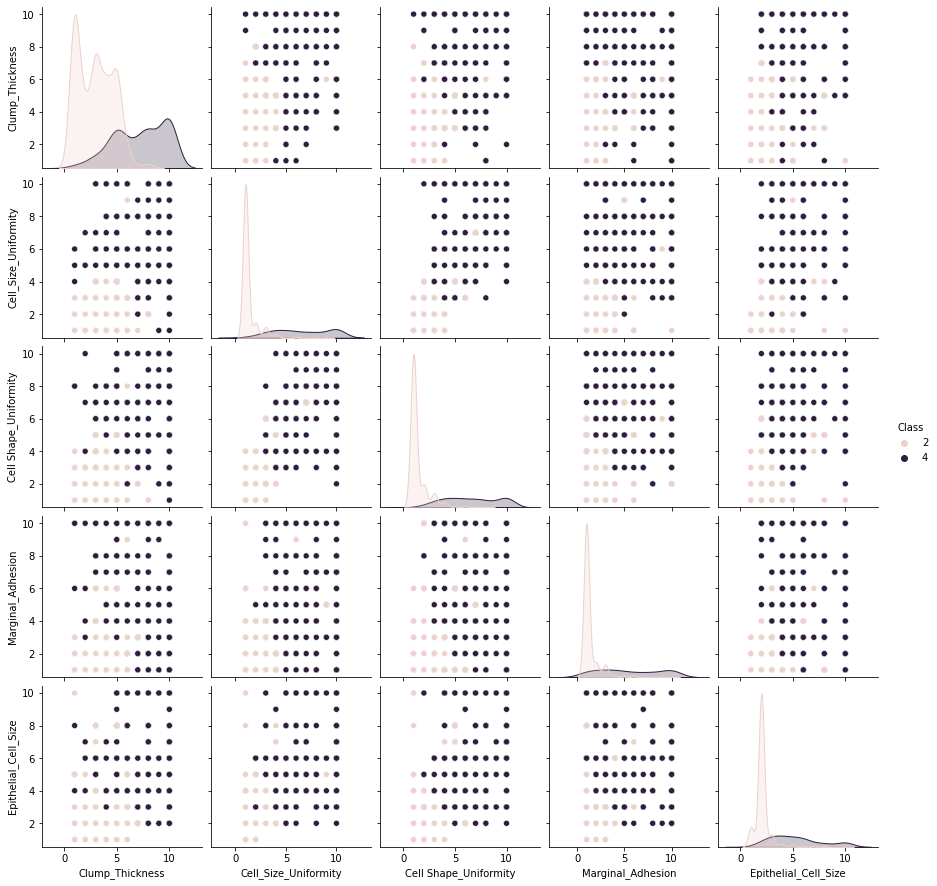

In [126]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, hue = 'Class', vars = ['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell Shape_Uniformity', 'Marginal_Adhesion',
       'Epithelial_Cell_Size'] )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


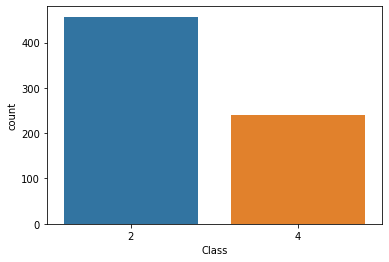

In [127]:
sns.countplot(data['Class'], label = "Count") 

Let's check the correlation between our features

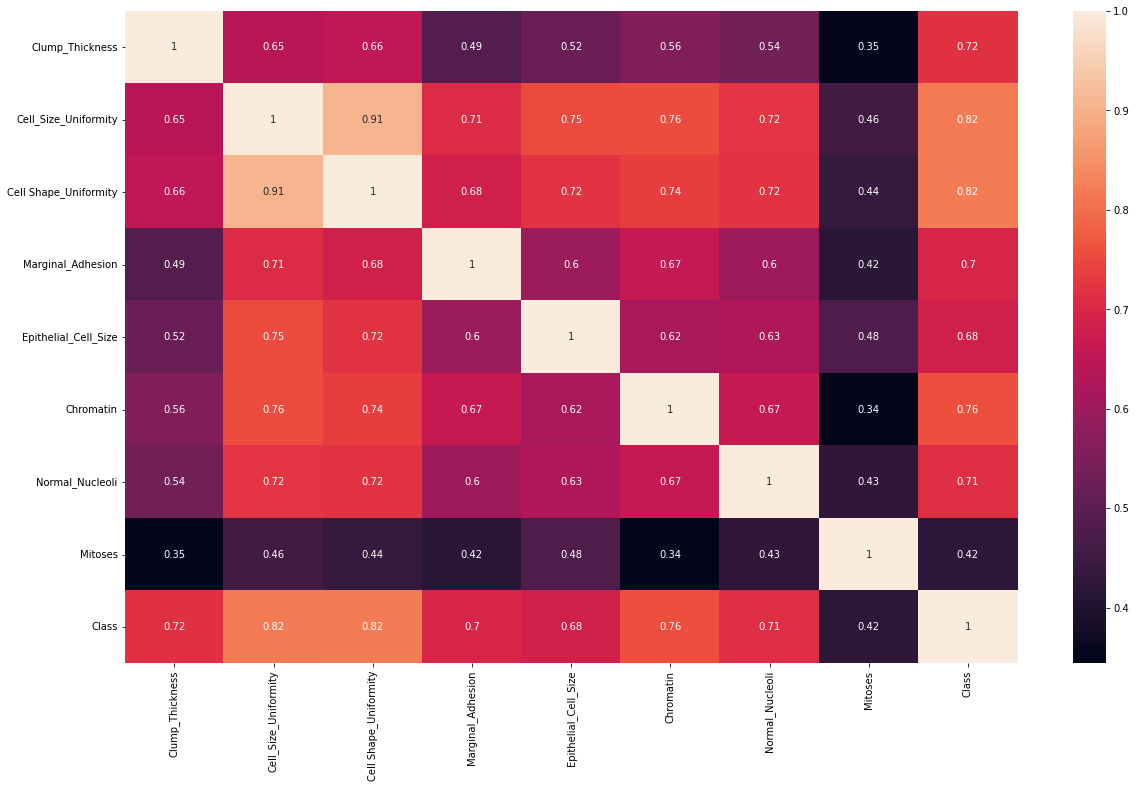

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [82]:
# "y" = Is the feature we are trying to predict (Output). In this case, we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign).
# we are going to use the "Class" feature here.
# "X" = The predictors which are the remaining columns (clump thickness, cell size uniformity, cell shape iniformity, Marginal Adhesion, Chromatin, etc)
# Define x
X = data.drop(['Class'], axis = 1) # We drop our "Class" feature and use all the remaining features in our dataframe to train the model.
X.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell Shape_Uniformity,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [83]:
y = data['Class']
y.head()

0    2
1    2
2    2
3    2
4    4
Name: Class, dtype: int64

In [84]:
#import the python library that will help us to split our dataset into training and testing data.
#Training data = Is the subset of our data used to train our model.
#Testing data = Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.
from sklearn.model_selection import train_test_split
#Let's split our data using 80% for training and the remaining 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [85]:
#Let now check the size our training and testing data.
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (558, 9)


The size of our testing "X" (input features) is (140, 9)


The size of our training "y" (output feature) is (558,)


The size of our testing "y" (output features) is (140,)


In [86]:
from sklearn.svm import SVC

In [87]:
svc_model = SVC()

In [88]:
#Now, let's train our SVM model with our "training" dataset.
svc_model.fit(X_train, y_train)

SVC()

In [89]:
#Let's use our trained model to make a prediction using our testing data
y_predict = svc_model.predict(X_test)

In [90]:
#Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). 
#We are going to use confusion matrix for this comparison
#True Positive: A positive class observation (1) is correctly classified as positive by the model.

#False Positive: A negative class observation (0) is incorrectly classified as positive.

#True Negative: A negative class observation is correctly classified as negative.

#False Negative: A positive class observation is incorrectly classified as negative.

# create confusion matrix
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.64      1.00      0.78        90
           4       0.00      0.00      0.00        50

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.41      0.64      0.50       140



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


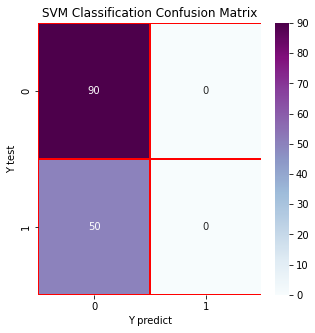

In [98]:
# The confusion matrix
svmcla_cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# predicted 50 healthy patients misdiagnosed as breast cancer

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))
# We train model
svmcla.fit(X_train, y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

In [103]:
# Test score
score_svmcla = svmcla.score(X_test, y_test)
print(score_svmcla)

0.6428571428571429


In [105]:
# Logistic regression classification
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


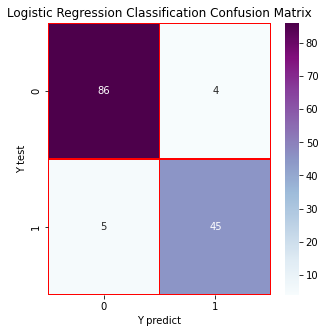

In [107]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# only 5 healthy patients misdiagnosed as cancer

In [108]:
# Test score
score_logreg = logreg.score(X_test, y_test)
print(score_logreg)

0.9357142857142857


In [109]:
# Naive bayes classification
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

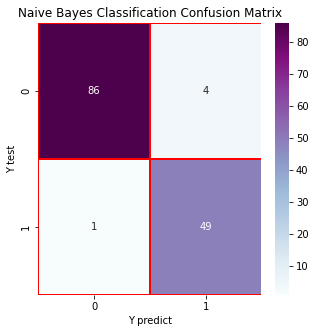

In [110]:
# The confusion matrix
nbcla_cm = confusion_matrix(y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# only 1 healthy patient misdiagnosed as cancer

In [111]:
# Test score
score_nbcla = nbcla.score(X_test, y_test)
print(score_nbcla)

0.9642857142857143


In [113]:
# Decision tree classification
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

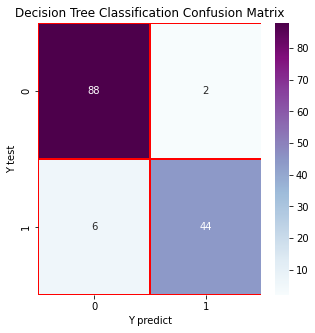

In [115]:
# The confusion matrix
dtcla_cm = confusion_matrix(y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# 6 healthy patients misdiagnosed as cancer

In [116]:
# Test score
score_dtcla = dtcla.score(X_test, y_test)
print(score_dtcla)

0.9428571428571428


In [117]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

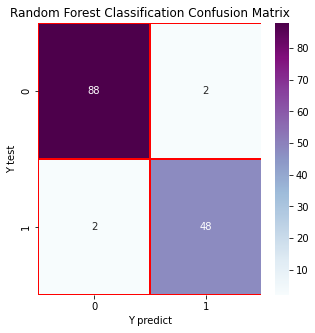

In [118]:
# The confusion matrix
rfcla_cm = confusion_matrix(y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# only 2 patients misdiagnosed as cancer

In [119]:
# Test score
score_rfcla = rfcla.score(X_test, y_test)
print(score_rfcla)

0.9714285714285714


In [120]:
# K-Nearest Neighbor classification
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

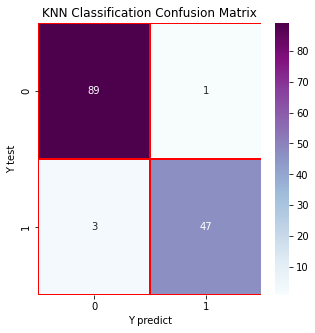

In [121]:
# The confusion matrix
knncla_cm = confusion_matrix(y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# 3 healthy patients misdiagnosed as cancer

In [122]:
# Test score
score_knncla= knncla.score(X_test, y_test)
print(score_knncla)

0.9714285714285714


In [123]:
# Comparison of classification techniques
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       0.935714
Support Vector Machine Score    0.642857
Naive Bayes Score               0.964286
Decision Tree Score             0.942857
Random Forest Score             0.971429
K-Nearest Neighbour Score       0.971429
dtype: float64


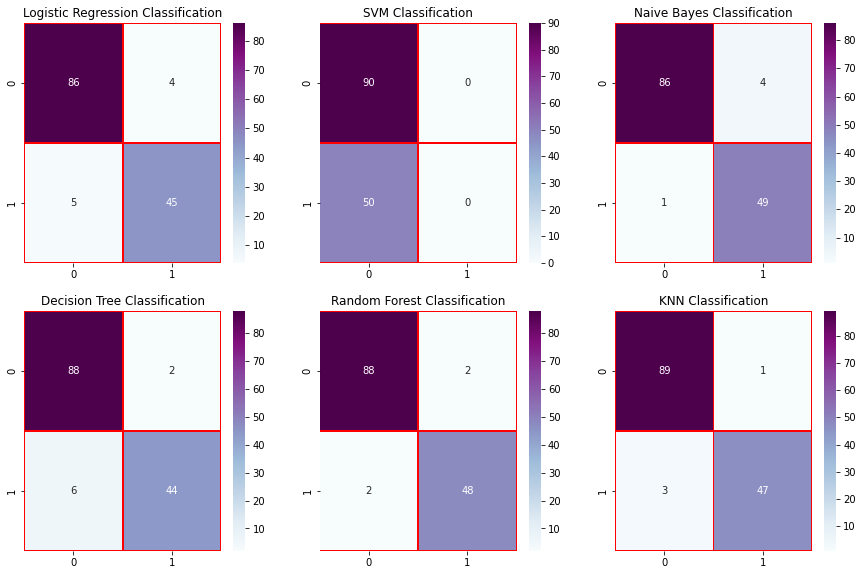

In [124]:
# The confusion matrix
# Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm for supervised learning.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax6)
plt.show()